# Fitting

This notebook is intended to fit the data associated with human CRISPRi activity scores to train a linear regression model to.

The data used is that from the following paper:

[Compact and highly active next-generation libraries for CRISPR-mediated gene repression and activation](https://elifesciences.org/articles/19760)

__Authors__: Anthony Hein, Briana Macedo, Manya Kapoor

---

We will attempt to build the following models:
* Fully Connected Neural Network
* Support Vector Machine
* Logisitc Regression
* Elastic Net Linear Regression

_NOTE_ : The paper only creates an Elastic Net Linear Regression model.

---

In [219]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [220]:
np.random.seed(0)

In [221]:
features_raw = pd.read_csv('features.csv')
features_raw.head()

,Unnamed: 0,score,+ve strand,length,longest A,longest C,longest G,longest T,As,Cs,...,pos_-4_GG,pos_-4_GT,pos_-4_TA,pos_-4_TC,pos_-4_TG,pos_-4_TT,dist prim 3',dist prim 5',dist snd 3',dist snd 5'
0,0,0.019320,1,24,1,1,2,2,0.142857,0.238095,...,0,0,0,0,0,0,0.478330,0.518617,0.479795,0.479443
1,1,0.348892,1,24,1,4,2,1,0.142857,0.476190,...,0,0,0,0,0,0,0.270749,0.307569,0.295142,0.294326
2,2,0.912409,1,24,1,3,2,1,0.095238,0.380952,...,0,0,0,0,1,0,0.267925,0.234560,0.266423,0.275421
3,3,0.997242,1,24,1,3,2,1,0.238095,0.238095,...,0,1,0,0,0,0,0.342018,0.288672,0.286673,0.299012
4,4,0.962154,1,24,1,3,3,2,0.047619,0.285714,...,1,0,0,0,0,0,0.510186,0.459465,0.366557,0.381031


In [222]:
scores_arr = np.array(features_raw['score'])
scores_arr

array([0.01932036, 0.34889211, 0.91240883, ..., 0.215028  , 1.17072619,
       0.57770586])

In [223]:
features_df = features_raw.drop(columns=['score', 'Unnamed: 0'])
features_arr = np.array(features_df)
features_arr

array([[ 1.        , 24.        ,  1.        , ...,  0.51861656,
         0.47979496,  0.47944258],
       [ 1.        , 24.        ,  1.        , ...,  0.30756917,
         0.29514227,  0.29432585],
       [ 1.        , 24.        ,  1.        , ...,  0.23456034,
         0.26642302,  0.2754214 ],
       ...,
       [ 0.        , 24.        ,  1.        , ...,  0.33450519,
         0.3079445 ,  0.30722301],
       [ 0.        , 24.        ,  2.        , ...,  0.32775753,
         0.27669514,  0.27639504],
       [ 0.        , 23.        ,  2.        , ...,  0.22159049,
         0.29204269,  0.30796885]])

In [224]:
# standardize the data to N(0,1)
scaler = StandardScaler()
scaler.fit(features_arr)
features_arr_std = scaler.transform(features_arr)

In [225]:
Xs_train = []
Ys_train = []

Xs_test = []
Ys_test = []

folds = KFold(n_splits=5, shuffle = True)

for train_index, test_index in folds.split(features_arr_std):
    Xs_train.append(features_arr_std[train_index])
    Ys_train.append(features_arr_std[train_index])
    
    Xs_train.append(features_arr_std[test_index])
    Ys_train.append(features_arr_std[test_index])

In [226]:
regr = ElasticNetCV(cv=5, random_state=0, max_iter=100000)
regr.fit(features_arr_std, scores_arr)
regr.coef_

array([ 3.67128494e-03, -1.85055474e-02, -6.60206097e-03, -0.00000000e+00,
       -2.89122632e-03, -3.28739326e-02, -0.00000000e+00,  0.00000000e+00,
        6.77703928e-03, -1.76453821e-02, -0.00000000e+00, -0.00000000e+00,
        4.10339995e-02,  0.00000000e+00,  0.00000000e+00, -7.05489565e-03,
        0.00000000e+00, -2.08123811e-04, -0.00000000e+00, -9.72607685e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.61455089e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.35712134e-02,
       -0.00000000e+00, -0.00000000e+00, -1.74765502e-03, -2.23544473e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  6.63589870e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  5.06415649e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [227]:
# R^2
regr.score(features_arr_std, scores_arr)

0.2140052761473561

In [228]:
# R
np.sqrt(regr.score(features_arr_std, scores_arr))

0.4626070429072131

In [229]:
preds = regr.predict(features_arr_std)

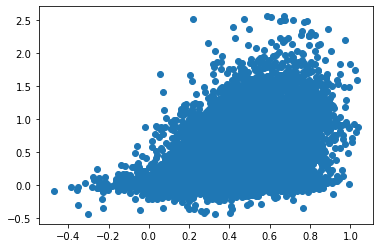

In [230]:
plt.scatter(preds, scores_arr)

In [231]:
mostNeg5 = np.argsort(regr.coef_)[0:5]
mostNeg5

array([474, 490,   5,  95, 442])

In [232]:
features_df.columns[mostNeg5]

Index(['pos_-5_GC', 'pos_-4_GC', 'longest T', 'pos_-7_G', 'pos_-7_GC'], dtype='object')

In [233]:
mostPos5 = np.argsort(regr.coef_)[-5:]
mostPos5

array([485, 105,  12, 497, 498])

In [234]:
features_df.columns[mostPos5]

Index(['pos_-4_CA', 'pos_-4_A', 'AG', 'dist prim 3'', 'dist prim 5''], dtype='object')

In [235]:
preds_bin = preds > 0.75
scores_bin = scores_arr > 0.75

In [236]:
np.sum(abs(preds_bin ^ scores_bin)) / len(preds_bin)

0.24575339117683

In [237]:
fpr, tpr, thresholds = metrics.roc_curve(scores_bin, preds)

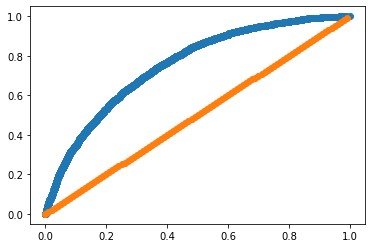

In [238]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(fpr, tpr)
ax1.scatter(np.arange(0,1,0.01), np.arange(0,1,0.01))
plt.show()

In [239]:
roc_auc_score(scores_bin, preds)

0.7532327570975244

Save coefficients as Numpy array for quick load in other notebooks.

In [240]:
with open("coef_elastic.npy", "wb") as f:
    np.save(f, regr.coef_)